# Ford GoBike System (Bay Wheels) Data Exploration and Visualization

<h3><center>by Kueh Seow Teck</center></h3>

**Ford GoBike** System, now known as [**Bay Wheels**](https://en.wikipedia.org/wiki/Bay_Wheels) is a regional public bicycle sharing system in California's San Francisco Bay Area. The operation first begane in August 2013 as **Bay Area Bike Share**, then re-launched as **Ford GoBike** in June 2017 in partnership with Ford Motor Company. In June 2019, after the operatior Motivate's acquisition by Lyft, the system is renamed to **Bay Wheels**.

For this project, the system data is compiled by Lyft and is available for public use and can be download [here](https://www.lyft.com/bikes/bay-wheels/system-data). The data available for download are from 2017 till August 2020 as of now.

In general, each trip contains the data below:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

I start my project with importing the necessary libraries and modules required for this project.

In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn as sb
import glob
import matplotlib.pyplot as plt

%matplotlib inline

## Data Wranggling
### Gathering

I have downloaded all the excel files for the Bay Wheel's trip data up to date and saved it into a folder named 'Files'.
I then read all the files and concat it into a dataframe and noticed that the excel files starting from April 2020 have different column names and a lot of missing data. So I have decided to only include data up till March 2020 for this visualization exercise.

In [2]:
folder_name = 'Files'
files = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
data = pd.concat(files, ignore_index=True)
print(data.shape)
data.head(5)

C:\Users\QWERTY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\QWERTY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\QWERTY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(5795411, 15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN


### Accessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795411 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 663.2+ MB


In [4]:
# number of rows in each columns with null values
data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id            578807
start_station_name          576973
start_station_latitude           0
start_station_longitude          0
end_station_id              580455
end_station_name            578629
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip    1667966
rental_access_method       5056715
dtype: int64

In [5]:
# number of rows which are duplicated
data.duplicated().sum()

7512

In [6]:
# number of unique start stations id
data.start_station_id.nunique()

467

In [7]:
# number of unique end stations id
data.end_station_id.nunique()

467

In [8]:
# Testing if the start and end stations are of the same list
start=data.start_station_id.tolist().sort()
end=data.end_station_id.tolist().sort()
print(start==end)

True


In [9]:
# number of unique stat stations name
data.start_station_name.nunique()

507

In [10]:
# number of unique end stations name
data.end_station_name.nunique()

507

It is weird that the number of unique start and end station ID is different from the station names

In [11]:
# number of bikes they have
data.bike_id.nunique()

15996

In [12]:
# types of users
data.user_type.value_counts()

Subscriber    4558646
Customer      1236765
Name: user_type, dtype: int64

In [13]:
data.rental_access_method.value_counts()

app        678481
clipper     60215
Name: rental_access_method, dtype: int64

In [14]:
data.bike_share_for_all_trip.value_counts()

No     3787538
Yes     339907
Name: bike_share_for_all_trip, dtype: int64

**Observations on the quality of the data**

Below are results from the earlier accessment on the data which will be dealt with in the next stage of data wrangling process; cleaning.
1. remove duplicated rows
2. start_time, end_time should be datetime format
3. start_station_id, end_station_id, bike_id should be string instead of float64
4. user_type and bike_share_for_all_trip should be categorical
5. Rental_access_method column have too much missing data.

### Cleaning

I start the cleaning process by creating a copy of the original dataframe and name it data_clean. From here on, any work on the database will be save as data_clean.

In [15]:
data_clean=data.copy()

#### 1. Remove duplicated rows
**Define**

Removing all duplicated rows using drop_duplicates()

**Code**

In [16]:
data_clean=data_clean.drop_duplicates()

**Test**

In [17]:
data_clean.duplicated().sum()

0

#### 2. Change data format for start_time and end_time 
**Define**

Converting the datatype for start_time and end_time from string to pandas datetime object using pd.to_datetime()

**Code**

In [18]:
data_clean['start_time']=pd.to_datetime(data_clean['start_time'])
data_clean['end_time']=pd.to_datetime(data_clean['end_time'])

**Test**

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787899 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 706.5+ MB


#### 3. Change datatype for start_station_id, end_station_id, bike_id from float64 to string
**Define**

Change datatype for start_station_id, end_station_id, bike_id from float64 to string using astype('str')

**Code**

In [20]:
data_clean['start_station_id']=data_clean['start_station_id'].astype('str')
data_clean['end_station_id']=data_clean['end_station_id'].astype('str')
data_clean['bike_id']=data_clean['bike_id'].astype('str')

**Test**

In [21]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787899 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 706.5+ MB


#### 4. Change user_type and bike_share_for_all_trip from string to categorical datatype
**Define**

Change user_type and bike_share_for_all_trip from string to categorical datatype using astype('category')

**Code**

In [22]:
data_clean['user_type']=data_clean['user_type'].astype('category')
data_clean['bike_share_for_all_trip']=data_clean['bike_share_for_all_trip'].astype('category')

**Test**

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787899 entries, 0 to 5795410
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     object        
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 629.3+ MB


Rental_access_method column with values app and clipper which is unexplained in the lyft website and this column have too much missing data.

#### 5. Dropping rental_access_method column
**Define**

Dropping the column rental_access_method using .drop() method

**Code**

In [24]:
data_clean.drop('rental_access_method',inplace=True ,axis=1)

**Test**

In [25]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787899 entries, 0 to 5795410
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 585.1+ MB


#### 6. Remove rows with NaN 
**Define**

Remove all rows with NaN using dropna()

**Code**

In [26]:
data_clean=data_clean.dropna()

**Test**

In [27]:
data_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 519700 to 4738891
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             4114929 non-null  int64         
 1   start_time               4114929 non-null  datetime64[ns]
 2   end_time                 4114929 non-null  datetime64[ns]
 3   start_station_id         4114929 non-null  object        
 4   start_station_name       4114929 non-null  object        
 5   start_station_latitude   4114929 non-null  float64       
 6   start_station_longitude  4114929 non-null  float64       
 7   end_station_id           4114929 non-null  object        
 8   end_station_name         4114929 non-null  object        
 9   end_station_latitude     4114929 non-null  float64       
 10  end_station_longitude    4114929 non-null  float64       
 11  bike_id                  4114929 non-null  object        


#### 7. Converting the values of duration_sec to duration_min
**Define**

Converting the values of duration_sec to minute and save into column duration_min, after that drop duration_sec column.

**Code**

In [28]:
data_clean['duration_min']=data_clean['duration_sec']/60

In [29]:
data_clean=data_clean.drop('duration_sec',axis=1)

**Test**

In [30]:
data_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 519700 to 4738891
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   start_time               4114929 non-null  datetime64[ns]
 1   end_time                 4114929 non-null  datetime64[ns]
 2   start_station_id         4114929 non-null  object        
 3   start_station_name       4114929 non-null  object        
 4   start_station_latitude   4114929 non-null  float64       
 5   start_station_longitude  4114929 non-null  float64       
 6   end_station_id           4114929 non-null  object        
 7   end_station_name         4114929 non-null  object        
 8   end_station_latitude     4114929 non-null  float64       
 9   end_station_longitude    4114929 non-null  float64       
 10  bike_id                  4114929 non-null  object        
 11  user_type                4114929 non-null  category      


#### 7. Expanding start_time column into start_date, start_hour, start_day,start_month
**Define**

Add new columns start_hour, start_day, start_month for easy visualization.

**Code**

In [31]:
data_clean['start_date']=data_clean.start_time.dt.strftime('%Y-%m-%d')
data_clean['start_hour']=data_clean.start_time.dt.strftime('%H')
data_clean['start_day']=data_clean.start_time.dt.strftime('%A')
data_clean['start_month']=data_clean.start_time.dt.strftime('%B')

**Test**

In [41]:
data_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114929 entries, 519700 to 4738891
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   start_time               4114929 non-null  datetime64[ns]
 1   end_time                 4114929 non-null  datetime64[ns]
 2   start_station_id         4114929 non-null  object        
 3   start_station_name       4114929 non-null  object        
 4   start_station_latitude   4114929 non-null  float64       
 5   start_station_longitude  4114929 non-null  float64       
 6   end_station_id           4114929 non-null  object        
 7   end_station_name         4114929 non-null  object        
 8   end_station_latitude     4114929 non-null  float64       
 9   end_station_longitude    4114929 non-null  float64       
 10  bike_id                  4114929 non-null  object        
 11  user_type                4114929 non-null  category      


In [33]:
data_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_date,start_hour,start_day,start_month
519700,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,2018-01-31,22,Wednesday,January
519701,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,2018-01-31,16,Wednesday,January
519702,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,2018-01-31,14,Wednesday,January
519703,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,2018-01-31,14,Wednesday,January
519704,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,2018-01-31,19,Wednesday,January


**Exporting cleaned database into csv file**

In [34]:
data_clean.to_csv('data_clean.csv',index=False)

In [2]:
data_clean=pd.read_csv('data_clean.csv')

In [43]:
data_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4114929 entries, 0 to 4114928
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   start_time               4114929 non-null  object 
 1   end_time                 4114929 non-null  object 
 2   start_station_id         4114929 non-null  float64
 3   start_station_name       4114929 non-null  object 
 4   start_station_latitude   4114929 non-null  float64
 5   start_station_longitude  4114929 non-null  float64
 6   end_station_id           4114929 non-null  float64
 7   end_station_name         4114929 non-null  object 
 8   end_station_latitude     4114929 non-null  float64
 9   end_station_longitude    4114929 non-null  float64
 10  bike_id                  4114929 non-null  int64  
 11  user_type                4114929 non-null  object 
 12  bike_share_for_all_trip  4114929 non-null  object 
 13  duration_min             4114929 non-null 

In [44]:
data_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_date,start_hour,start_day,start_month
0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,2018-01-31,22,Wednesday,January
1,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,2018-01-31,16,Wednesday,January
2,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,2018-01-31,14,Wednesday,January
3,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,2018-01-31,14,Wednesday,January
4,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,2018-01-31,19,Wednesday,January


### Preliminary accessment of the database

The cleaned database contains data for each trips taken by the users from 2017 till March 2020. The columns primarily can be devided into five categories: 

1. **Trip duration related data**: This category of data contains date and time related info for each of the trip such as *duration_sec* taken for each trip, *start_time* and *end_time* of each trip.
2. **Station related data**: This category contains string data for each trips such as the *start_station_name* and *start_station_id*, *end_station_name* and *end_station_id*, *start_station_latitude* and *start_station_longitude*, *end_station_latitude* and *end_station_longitude*
3. **User related data**: *user_type* which describes if the user is a subscriber to the service or just a regular customer
4. **Bike related data**: *bike_id* describes the unique identification number of the bike used for each particular trip
5. **Derived variables**: From the datetime objects, I also derived the *duration_min*, *start_date*, *start_hour*, *start_day*, and *start_month* to assist me with the data exploration and analysis process

### Points of interest

From the dataset, I would like to investigate the ride count distribution for a given time of the day, day of the week and month in a year. I am also interested in investigating the distribution of the total duration of each ride across a given time of the day, day of the week and month in a year. Other than that, I also would like to investigate the ride count distribution difference between the subscribed users and casual users. 
Below are some of the key questions:
- When is the ride most popular in terms of time of day, day of the week or month of the year?
- Who are the main customer group: subscribers or normal customers?
- What is the average trip duration?
- Does the count of usage of subscriber and customer users changes throughout a year?
- Does subscriber and customer uses the system similarly in terms of when they take their ride? 


## Exploratory Data Anaysis

Three methods of exploration below are used in exploring the data:
1. Univariate Exploration
2. Bivariate Exploration
3. Multivariate Exploration

### Univariate Exploration


#### 1. When is the ride most popular in terms of time of day, day of the week or month of the year?

**Total ride counts distribution by Hour of day**

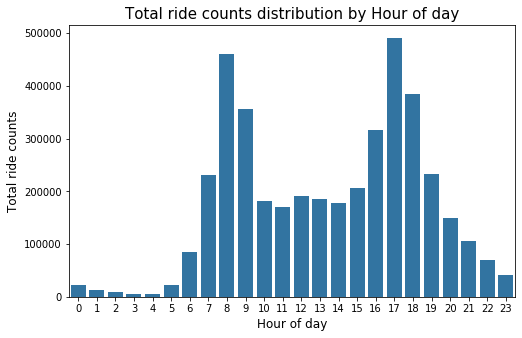

In [29]:
plt.figure(figsize=(8,5))
base_color=sb.color_palette()[0]
sb.countplot(data=data_clean,x='start_hour',color=base_color)
plt.xlabel('Hour of day',size=12)
plt.ylabel('Total ride counts',size=12)
plt.title('Total ride counts distribution by Hour of day',size=15)
plt.savefig('rides_hour.png');

We see that the distribution is bimodal with two peaks at around 8am and 5pm. The ride counts between midnight till 5am is relatively low with majority of the ride count distribution distributed around 6am to 12am. The ride counts during the day stays around 200000 counts and dwindles down to starting from 6pm. 

**Total ride counts distribution by day of Week**

In [34]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

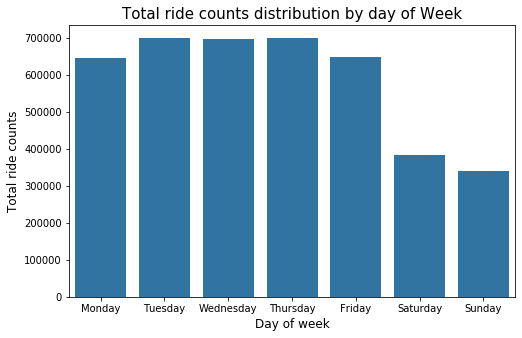

In [186]:
plt.figure(figsize=(8,5))
sb.countplot(data=data_clean,x='start_day',color=base_color,order=days)
plt.xlabel('Day of week',size=12)
plt.ylabel('Total ride counts',size=12)
plt.title('Total ride counts distribution by day of Week',size=15);

Total ride count distribution through out the weekdays are relatively similar hovering between 600000 and 700000 rides in total. On weekends the ride counts reduced by 30%, with total ride counts around 30000 and 40000 rides. 

**Total ride counts distribution by Month of Year**

In [26]:
months=['January','February','March','April','May','June','July','August','September','October','November','December']

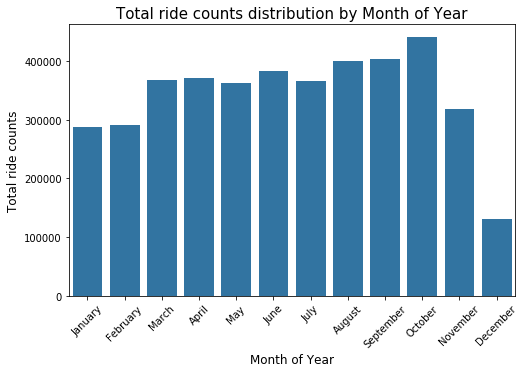

In [189]:
plt.figure(figsize=(8,5))
sb.countplot(data=data_clean,x='start_month',color=base_color,order=months)
plt.xticks(rotation=45)
plt.xlabel('Month of Year',size=12)
plt.ylabel('Total ride counts',size=12)
plt.title('Total ride counts distribution by Month of Year',size=15);

The total ride counts for January and February are around the same. The numbers jump quite a bit for March and are rose steadily till it peaks for October. November and December having lower total ride counts with December having the lowest which is around 100000 rides in total.

#### 2. Who are the main customer group: subscribers or normal customers?

**Total ride counts between Subscriber and Customer**

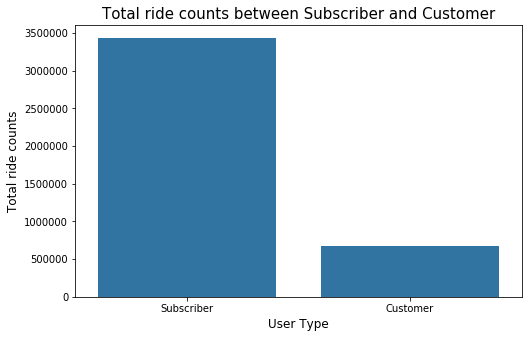

In [190]:
plt.figure(figsize=(8,5))
sb.countplot(data=data_clean,x='user_type',color=base_color)
plt.xlabel('User Type',size=12)
plt.ylabel('Total ride counts',size=12)
plt.title('Total ride counts between Subscriber and Customer',size=15);

In [9]:
data_clean.user_type.value_counts()

Subscriber    3435786
Customer       679143
Name: user_type, dtype: int64

The total ride counts from subcribers are 7 times more than customers. The total ride taken by subscribers is 3435786 while rides taken by customer is 679143.

**Total ride counts distribution between Bike Share and Non Bike Share Trip**

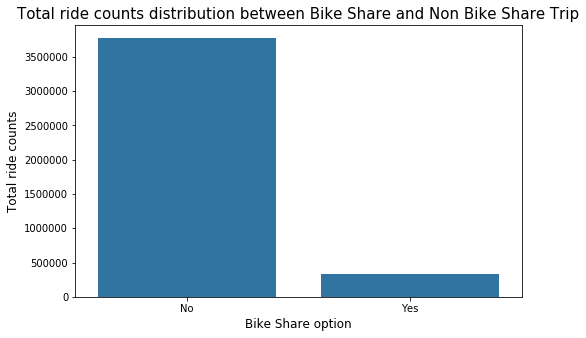

In [191]:
plt.figure(figsize=(8,5))
sb.countplot(data=data_clean,x='bike_share_for_all_trip',color=base_color)
plt.xlabel('Bike Share option',size=12)
plt.ylabel('Total ride counts',size=12)
plt.title('Total ride counts distribution between Bike Share and Non Bike Share Trip',size=15);

In [10]:
data_clean.bike_share_for_all_trip.value_counts()

No     3775899
Yes     339030
Name: bike_share_for_all_trip, dtype: int64

3775899 from the total ride counts are non sharing bike trips while 339030 trips are shared trips.

#### 3. What is the average trip duration?

**The count distribution for trip durations in minute**

In [7]:
data_clean.duration_min.describe()

count    4.114929e+06
mean     1.379440e+01
std      3.533832e+01
min      1.016667e+00
25%      5.900000e+00
50%      9.383333e+00
75%      1.463333e+01
max      1.439433e+03
Name: duration_min, dtype: float64

In [38]:
bin_edge=np.arange(0,60,1)
ticks=np.arange(0,60,5)

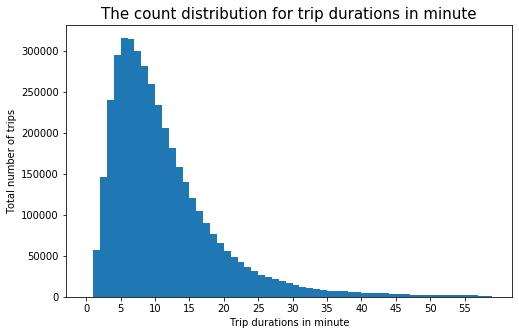

In [39]:
plt.figure(figsize=(8,5))
plt.hist(data=data_clean,x='duration_min',bins=bin_edge)
plt.xticks(ticks,ticks)
plt.xlabel('Trip durations in minute')
plt.ylabel('Total number of trips')
plt.title('The count distribution for trip durations in minute',size=15)
plt.savefig('rides_duration');

Almost all the trip are within 60 minutes time interval, with most ranging between 5-10 minutes. This can be further explore in the bivariate and multivariate exploration sections below.

### Bivariate Exploration

Due to the heavily positively skewed, I have decided to limit the range of the data being visualized for the ride duration in minutes to only 60 minutes.

**Ride duration in minute for Subcriber and Customer**

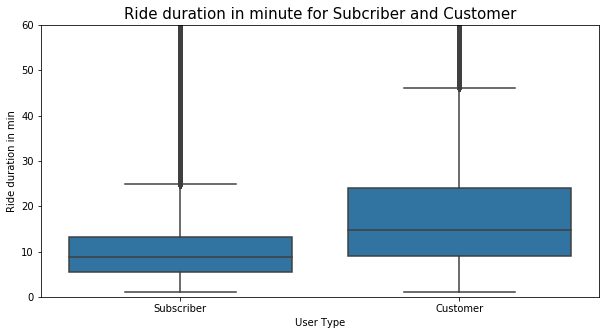

In [31]:
plt.figure(figsize=(10,5))
sb.boxplot(data=data_clean,x='user_type',y='duration_min',color=base_color)
plt.ylim(0,60)
plt.xlabel('User Type',size=10)
plt.ylabel('Ride duration in min',size=10)
plt.title('Ride duration in minute for Subcriber and Customer', size=15)
plt.savefig('duration_usertype.png');

The trip duration in minutes for the subscribers are narrower compared with casual customers. The subscribers having a smaller interquartile range of 10 minutes and median of almost 10 minutes. Customer on the other hand have an interquartile range of almost 15 minutes and median of 15 minutes.

**Median of the ride duration for each hour of the day**

In [23]:
hours=np.arange(0,24,1)

In [22]:
df_hour_median=data_clean.groupby('start_hour').median()['duration_min'].to_frame().reset_index()

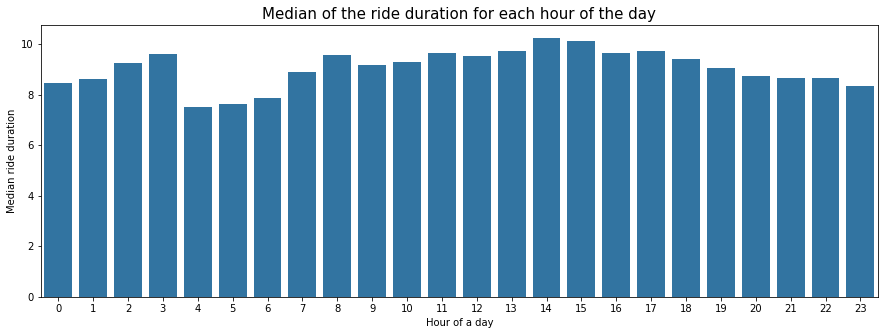

In [24]:
plt.figure(figsize=(15,5))
sb.barplot(data=df_hour_median,x='start_hour',y='duration_min',order=hours,color=base_color)
plt.xlabel('Hour of a day',size=10)
plt.ylabel('Median ride duration',size=10)
plt.title('Median of the ride duration for each hour of the day', size=15);

Suprizingly the median ride duration throughout the day is kept within 7-10 minutes.

**Median of the ride duration for each day of a week**

In [46]:
df_day_median=data_clean.groupby('start_day').median()['duration_min'].to_frame().reset_index()

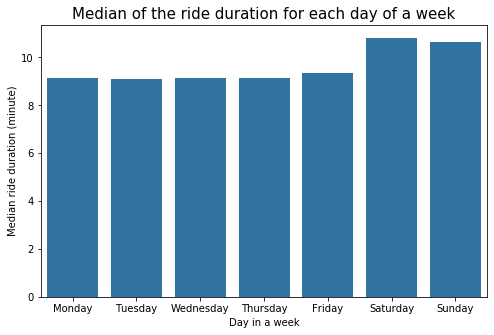

In [47]:
plt.figure(figsize=(8,5))
sb.barplot(data=df_day_median,x='start_day',y='duration_min',order=days,color=base_color)
plt.ylabel('Median ride duration (minute)',size=10)
plt.xlabel('Day in a week',size=10)
plt.title('Median of the ride duration for each day of a week',size=15);

Median ride duration during week days is uniform which is around 9 minutes with weekends having ride durations of 10 minutes.

**Median of the ride duration for each month of the year**

In [158]:
df_month_median=data_clean.groupby('start_month').median()['duration_min'].to_frame().reset_index()

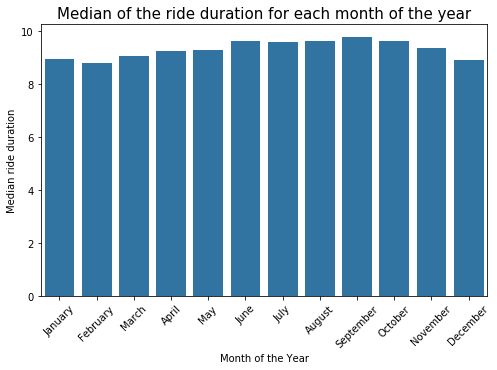

In [173]:
plt.figure(figsize=(8,5))
sb.barplot(data=df_month_median,x='start_month',y='duration_min',color=base_color,order=months)
plt.xticks(rotation=45)
plt.ylabel('Median ride duration',size=10)
plt.xlabel('Month of the Year',size=10)
plt.title('Median of the ride duration for each month of the year', size=15);

There are also not much difference in terms of ride duration in between the months with the median ride duration ranging in between 8-10 minutes.


#### 4. Does the count of usage of subscriber and customer users changes throughout a year?

**Total number of rides over the day**

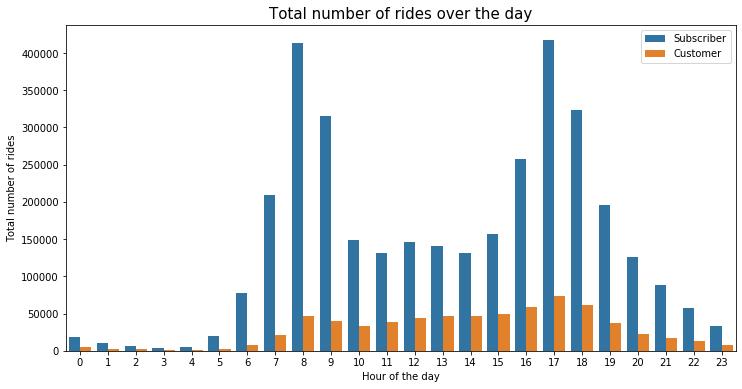

In [32]:
plt.figure(figsize=(12,6))
sb.countplot(data=data_clean,x='start_hour',hue='user_type',order=hours)
plt.xlabel('Hour of the day')
plt.ylabel('Total number of rides')
plt.title('Total number of rides over the day',size=15)
plt.legend(loc=1)
plt.savefig('rides_hour_usertype.png');

As we saw in the univariate exploration section, the total number of rides in total in a day is bimodal which peaks at 8am and 5pm. However, when we break it down between subscribers and casual customers the bimodal distribution is not so obvious for the customers.

**Total number of rides over the week**

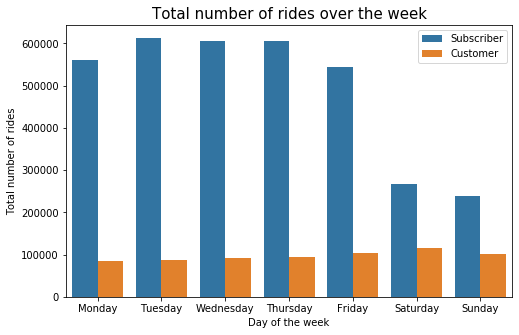

In [186]:
plt.figure(figsize=(8,5))
sb.countplot(data=data_clean,x='start_day',hue='user_type',order=days)
plt.xlabel('Day of the week')
plt.ylabel('Total number of rides')
plt.title('Total number of rides over the week',size=15)
plt.legend();

The total number of rides for subscribers are high, high around 500000 to 600000 and dropped to around 300000 during the weekends. This trend is not observed for the customers where their total number of rides for weekdays and weekends stays relatively constant around 100000.

**Total number of rides over the Months**

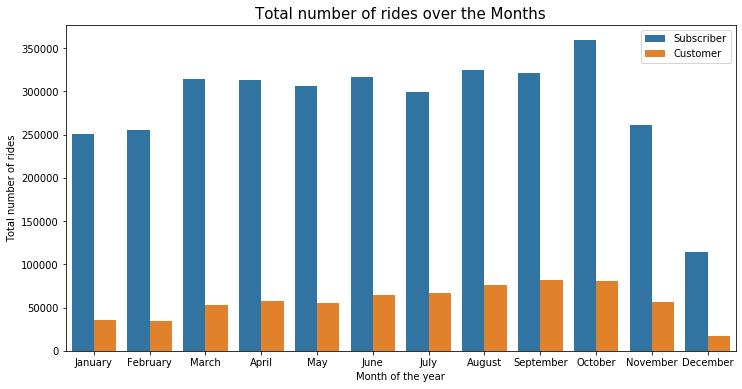

In [28]:
plt.figure(figsize=(12,6))
sb.countplot(data=data_clean,x='start_month',hue='user_type',order=months)
plt.xlabel('Month of the year')
plt.ylabel('Total number of rides')
plt.title('Total number of rides over the Months',size=15)
plt.legend(loc=1)
plt.savefig('rides_month.png');

The total number of rides by months for both subscriber and customer are showing the same trend as what we have uncover in the univariate section. Both showing an increase from the beginning of the year and peaked in October then decline until December.

### Multivariate Exploration

#### 5. Does subscriber and customer uses the system similarly in terms of when they take their ride?

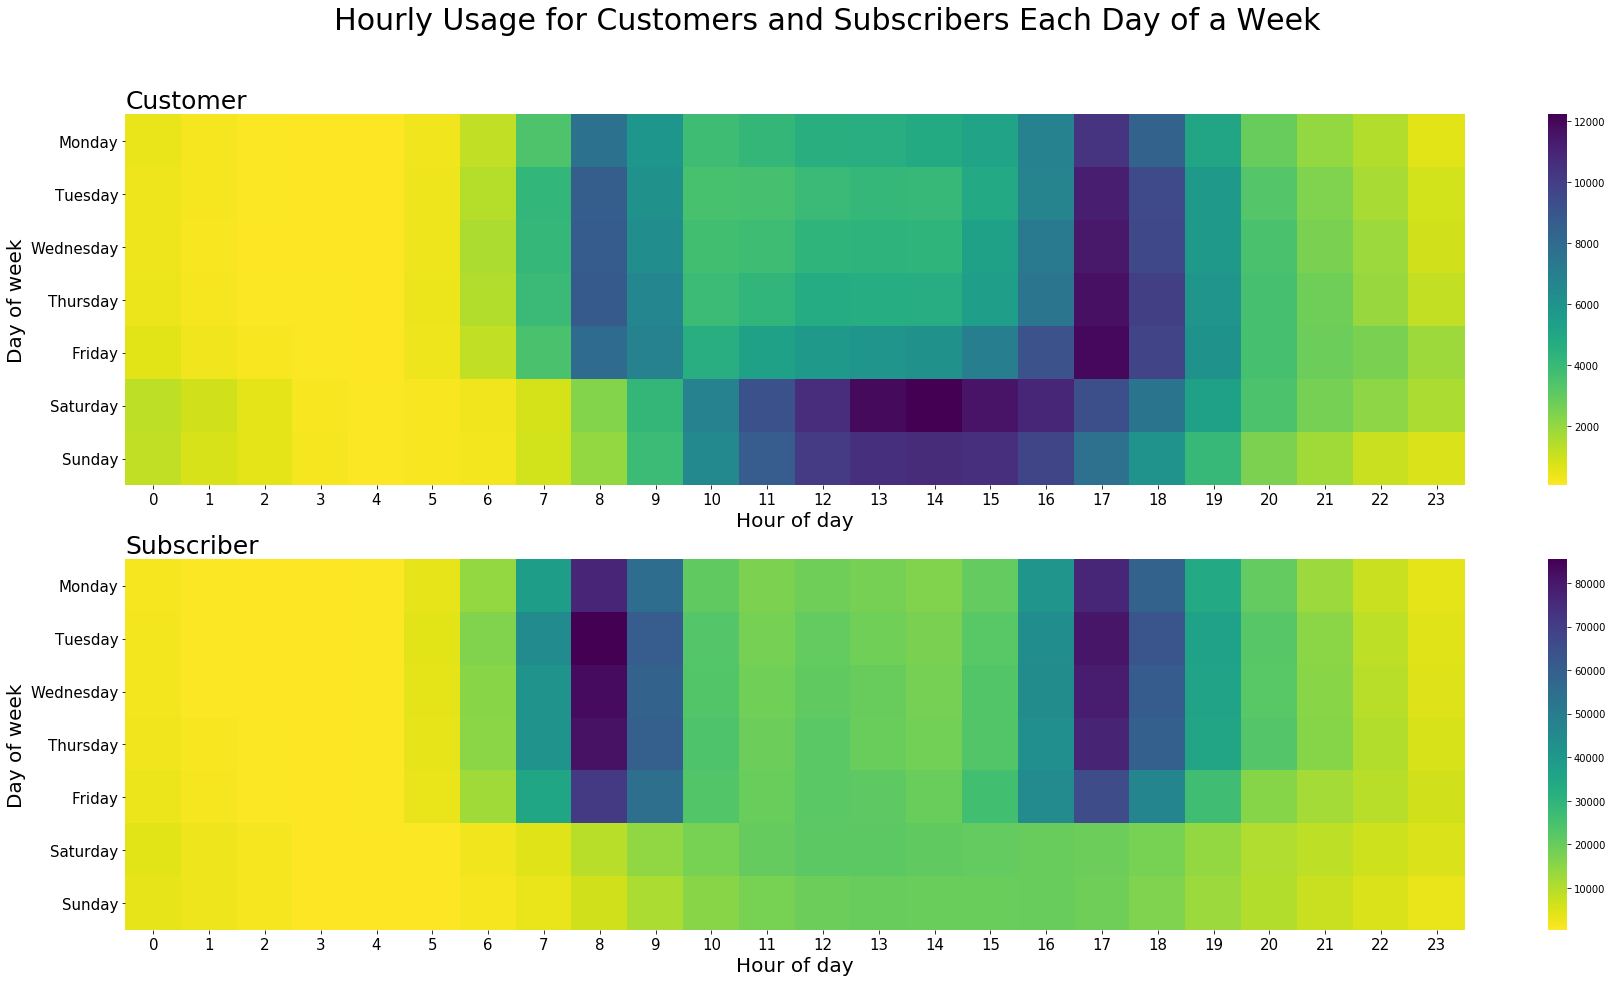

In [35]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
df_customer=data_clean.query('user_type=="Customer"')
df_customer=df_customer.groupby(['start_day','start_hour']).size().reset_index(name='count')
df_customer=df_customer.pivot(index='start_day',columns='start_hour',values='count')
df_customer=df_customer.reindex(index=days)
sb.heatmap(df_customer,cmap='viridis_r')
plt.xlabel('Hour of day',size=20)
plt.ylabel('Day of week',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Customer',loc='left',size=25)

plt.subplot(2,1,2)
df_subscriber=data_clean.query('user_type=="Subscriber"')
df_subscriber=df_subscriber.groupby(['start_day','start_hour']).size().reset_index(name='count')
df_subscriber=df_subscriber.pivot(index='start_day',columns='start_hour',values='count')
df_subscriber=df_subscriber.reindex(index=days)
sb.heatmap(df_subscriber,cmap='viridis_r')
plt.xlabel('Hour of day',size=20)
plt.ylabel('Day of week',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Subscriber',loc='left',size=25)

plt.suptitle('Hourly Usage for Customers and Subscribers Each Day of a Week', size=30,x=0.45)
plt.savefig('rides_hour_week_usertype.png')

Previously in the univariate and bivariate exploration phase, we found out that the distribution of total number of rides for subscriber is bimodal peaking at 8am and 5pm while the distribution for customers are mostly constant around 8am till 5pm. By adding a third dimension (Day of week) to the way we visualize the data, we can see that this trend is dependant on which day of week. 

So for both customer and subscriber, we see similar trends of having bimodal distribution for the total number of rides peaking at 8am and 5pm on weekdays. On weekends, the distribution of total rides for customers are mostly focus on the time range between 9am till 6pm; peaking at around 1pm. The distribution on weekends for the subscriber on the other hand is relatively flat, having a normal distribution.